<a href="https://colab.research.google.com/github/christina3099/Resale-car-price-prediction/blob/main/Resale_Car_Value_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Resale Value Estimation Using Predictive Modeling

This notebook demonstrates how structured automobile data can be transformed into actionable insights for predicting car resale values using ML techniques. We'll explore the dataset and build robust predictive model.

## Key Highlights
- Comprehensive exploratory data analysis
- Feature engineering based on domain knowledge
- Model comparison and selection
- Cross-validation and performance evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# 1. Data Loading and Initial Exploration

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujay1844/used-car-prices")

print("Path to dataset files:", path)

100%|██████████| 139k/139k [00:00<00:00, 50.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sujay1844/used-car-prices/versions/3


In [3]:
cars = pd.read_csv(path + '/train.csv')

In [4]:
cars.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


# 2. Data Cleaning


*   Removing invalid data/columns
*   Handling Missing values
* Encoding Categorical columns





In [ ]:
cars.duplicated().sum()

np.int64(0)

In [ ]:
cars.isna().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


In [ ]:
cars[cars['Mileage'].isna()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4313,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4762,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [6]:
cars.drop(columns=['New_Price'],axis=1, inplace=True)

In [ ]:
cars['Mileage'].describe()

,Mileage
count,5809.000000
mean,18.200139
std,4.296410
min,0.000000
25%,15.260000
50%,18.200000
75%,21.100000
max,28.400000


In [ ]:
cars[cars['Mileage']=='0.0 kmpl'].value_counts()

,,,,,,,,,,,,,count
Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,1
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.67,1
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0 kmpl,1950 CC,181.43 bhp,5.0,38.99,1
707,Mercedes-Benz M-Class ML 350 4Matic,Pune,2014,120000,Diesel,Automatic,First,0.0 kmpl,2987 CC,165 bhp,5.0,30.00,1
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,39.50,1
996,Hyundai Santro Xing GL,Pune,2008,93000,Petrol,Manual,First,0.0 kmpl,1086 CC,62 bhp,5.0,1.45,1
1059,Hyundai Santro Xing GL,Hyderabad,2010,58163,Petrol,Manual,First,0.0 kmpl,1086 CC,62 bhp,5.0,2.45,1
1259,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,11.00,1
1308,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,2014,33000,Diesel,Automatic,Second,0.0 kmpl,2987 CC,165 bhp,5.0,43.00,1


In [7]:
cars['Mileage'] = cars['Mileage'].str.replace(' kmpl', '', regex=False).str.replace(' km/kg', '', regex=False).astype(float)

In [ ]:
cars.isna().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


In [ ]:
cars[cars['Mileage'].isna()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4313,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4762,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [ ]:
cars['Mileage'] = cars['Mileage'].fillna(cars['Mileage'].median())

In [ ]:
cars.isna().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,36


In [8]:
cars['Engine'] = cars['Engine'].str.replace(' CC', '', regex=False).astype(float)
cars['Power'] = cars['Power'].str.replace(' bhp', '', regex=False).astype(float)

In [ ]:
import numpy as np
cars.describe(include=np.number)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5847.000000,5.847000e+03,5845.000000,5811.000000,5811.000000,5809.000000,5847.000000
mean,2013.448435,5.841013e+04,18.158496,1631.552573,113.803144,5.286452,9.653742
std,3.194949,9.237971e+04,4.358246,601.972587,53.896719,0.806668,11.275966
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.346750e+04,15.260000,1198.000000,78.000000,5.000000,3.550000
50%,2014.000000,5.257600e+04,18.190000,1497.000000,98.600000,5.000000,5.750000
75%,2016.000000,7.249050e+04,21.100000,1991.000000,139.010000,5.000000,10.250000
max,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,160.000000


In [9]:
cars = cars.dropna(subset=['Engine'])


In [10]:
cars['Seats'] = pd.to_numeric(cars['Seats'], errors='coerce')
cars = cars.dropna(subset=['Seats'])

In [11]:
cars.isna().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,0


In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5809 entries, 0 to 5846
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5809 non-null   object 
 1   Location           5809 non-null   object 
 2   Year               5809 non-null   int64  
 3   Kilometers_Driven  5809 non-null   int64  
 4   Fuel_Type          5809 non-null   object 
 5   Transmission       5809 non-null   object 
 6   Owner_Type         5809 non-null   object 
 7   Mileage            5807 non-null   float64
 8   Engine             5809 non-null   float64
 9   Power              5809 non-null   float64
 10  Seats              5809 non-null   float64
 11  Price              5809 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 590.0+ KB


In [12]:
cars.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [ ]:
for col in cars.columns:
    print(col, cars[col].value_counts())

Location Location
Mumbai        757
Hyderabad     709
Kochi         637
Coimbatore    629
Pune          581
Delhi         535
Kolkata       521
Chennai       474
Jaipur        401
Bangalore     348
Ahmedabad     217
Name: count, dtype: int64
Year Year
2014    782
2016    733
2015    732
2013    630
2017    581
2012    551
2011    450
2010    328
2018    294
2009    191
2008    160
2007    104
2019    101
2006     66
2005     43
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: count, dtype: int64
Kilometers_Driven Kilometers_Driven
60000     80
45000     69
65000     67
50000     60
55000     56
          ..
125928     1
54774      1
41123      1
17465      1
78088      1
Name: count, Length: 3007, dtype: int64
Fuel_Type Fuel_Type
Diesel    3153
Petrol    2656
Name: count, dtype: int64
Transmission Transmission
Manual       4107
Automatic    1702
Name: count, dtype: int64
Owner_Type Owner_Type
First             4787
Second             914
Third  

In [14]:
cars['Mileage'] = cars['Mileage'].replace(0.0, np.nan)

In [15]:
cars.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,30
Engine,0
Power,0


In [ ]:
cars['Name'].value_counts()

,count
Name,
Mahindra XUV500 W8 2WD,49
Maruti Swift VDI,45
Honda City 1.5 S MT,34
Maruti Swift Dzire VDI,34
Maruti Ritz VDi,30
...,...
Jaguar F Type 5.0 V8 S,1
Skoda Octavia Elegance 1.9 TDI,1
Renault Duster 110PS Diesel RXZ Optional with Nav,1


In [16]:
# ---  Extracting features from "Name" column ---
def extract_name_features(df):
    # Split the Name column into words
    name_split = df['Name'].str.split(' ')

    # Handle brand extraction
    df['Brand'] = name_split.str[0]

    # Special case: "Land Rover"
    df.loc[df['Brand'] == 'Land', 'Brand'] = (
        name_split.str[0] + " " + name_split.str[1]
    )

    # Extract model name (everything after the brand)
    df['Car_Model'] = df.apply(
        lambda row: row['Name'].replace(row['Brand'], '', 1).strip(), axis=1
    )

    return df



# ---  Apply transformations ---
cars = extract_name_features(cars)

In [17]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Model
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,4.50,Honda,Jazz V
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan,Micra Diesel XV


In [ ]:
cars[cars['Brand']=='Land Rover']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Model
11,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5,27.00,Land Rover,Range Rover 2.2L Pure
12,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,18.20,2179.0,115.00,5,17.50,Land Rover,Freelander 2 TD4 SE
183,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5,55.76,Land Rover,Range Rover 2.2L Dynamic
298,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.70,2179.0,187.70,5,44.00,Land Rover,Range Rover HSE Dynamic
384,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.70,2179.0,187.70,5,30.00,Land Rover,Range Rover 2.2L Dynamic
389,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.70,2179.0,187.70,5,53.83,Land Rover,Range Rover 2.2L Prestige
395,Land Rover Range Rover 2.2L Pure,Coimbatore,2014,95649,Diesel,Automatic,First,12.70,2179.0,187.70,5,29.67,Land Rover,Range Rover 2.2L Pure
460,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68,1999.0,177.00,5,33.50,Land Rover,Range Rover Evoque 2.0 TD4 Pure
501,Land Rover Range Rover HSE Dynamic,Coimbatore,2017,49275,Diesel,Automatic,First,12.70,2179.0,187.70,5,45.64,Land Rover,Range Rover HSE Dynamic
677,Land Rover Freelander 2 SE,Chennai,2011,109000,Diesel,Automatic,First,12.39,2179.0,147.51,5,16.50,Land Rover,Freelander 2 SE


In [ ]:
cars['Car_Model'].value_counts()

,count
Car_Model,
XUV500 W8 2WD,49
Swift VDI,45
City 1.5 S MT,34
Swift Dzire VDI,34
Ritz VDi,30
...,...
F Type 5.0 V8 S,1
Octavia Elegance 1.9 TDI,1
Duster 110PS Diesel RXZ Optional with Nav,1


In [ ]:
cars.groupby('Car_Model')['Mileage'].agg(['mean', 'median', 'min', 'max', 'count'])

,mean,median,min,max,count
Car_Model,,,,,
1 Series 118d Base,20.5800,20.58,20.58,20.58,2
1 Series 118d Sport Line,20.5800,20.58,20.58,20.58,1
3 Series 2005-2011 325i Sedan,10.9000,10.90,10.90,10.90,3
3 Series 318i Sedan,12.0500,12.05,12.05,12.05,1
3 Series 320d,19.3685,22.69,13.20,22.69,20
...,...,...,...,...,...
i20 Sportz Option Diesel,23.0000,23.00,23.00,23.00,2
i20 Sportz Petrol,17.0000,17.00,17.00,17.00,2
redi-GO S,22.7000,22.70,22.70,22.70,1


In [ ]:
cars.shape

(5847, 14)

In [18]:
# Step 1: global median
global_median = cars['Mileage'].median()

# Step 2: fill with group median, fallback to global median
cars['Mileage'] = cars.groupby(['Car_Model','Brand','Engine'])['Mileage'] \
    .transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median))

In [19]:
cars[cars['Mileage'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Model


In [20]:
cars.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [ ]:
cars['Power'] = cars.groupby(['Engine'])['Power'].transform(lambda x: x.fillna(x.median()))

In [ ]:

# --- 1. Handling missing values with domain-specific strategies ---
def clean_numeric_features(df):
    # Mileage (fill missing by median mileage grouped by Fuel_Type + Transmission)
    df['Mileage'] = df.groupby(['Car_Model'])['Mileage'].transform(
        lambda x: x.fillna(x.median())
    )

    # Engine (fill missing by median engine grouped by Fuel_Type)
    df['Engine'] = df.groupby(['Brand','Car_Model'])['Engine'].transform(
        lambda x: x.fillna(x.median())
    )

    # Power (fill missing by median power grouped by Engine size)
    df['Power'] = df.groupby(['Engine'])['Power'].transform(
        lambda x: x.fillna(x.median())
    )

    # Seats (fill missing by most common seat count for that Car Brand)
    df['Seats'] = df.groupby(['Brand','Car_Model'])['Seats'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
    )

    return df

cars = clean_numeric_features(cars)


In [21]:
print("Missing values after cleaning:\n", cars[['Mileage', 'Engine', 'Power', 'Seats']].isna().sum())

Missing values after cleaning:
 Mileage    0
Engine     0
Power      0
Seats      0
dtype: int64


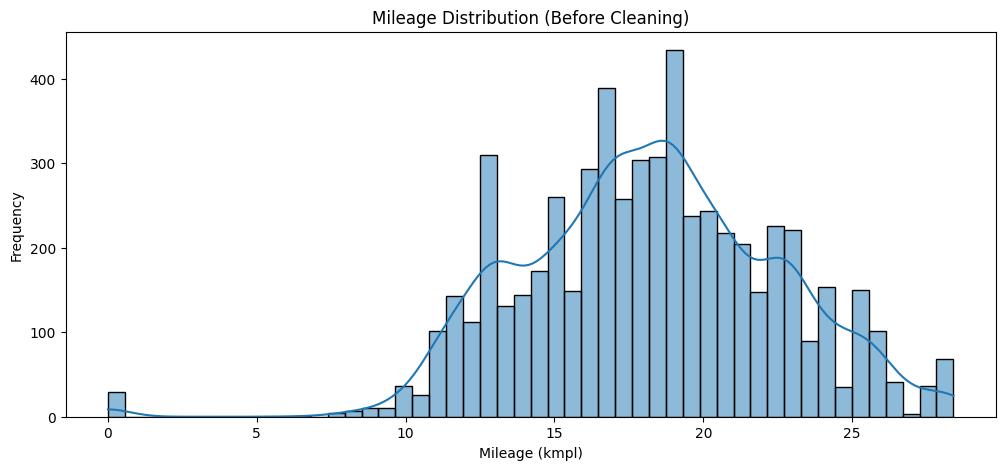

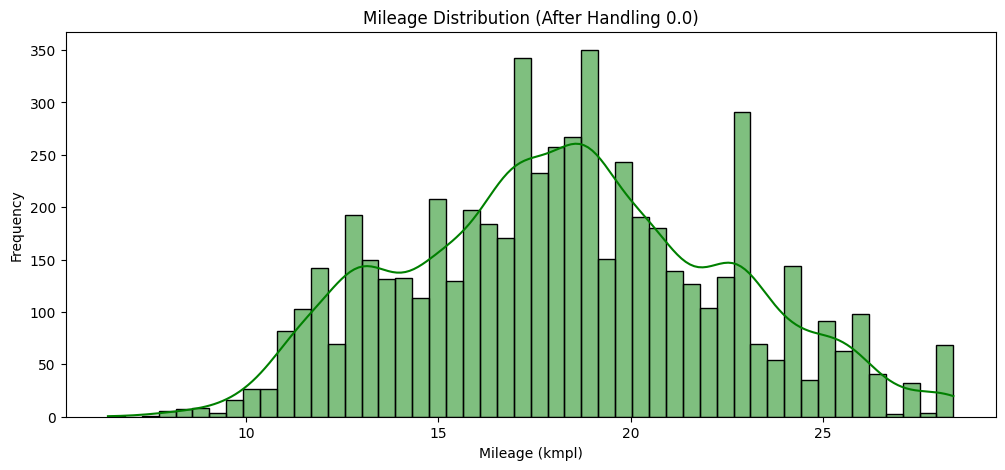

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Before handling ---
plt.figure(figsize=(12,5))
sns.histplot(cars['Mileage'], bins=50, kde=True)
plt.title("Mileage Distribution (Before Cleaning)")
plt.xlabel("Mileage (kmpl)")
plt.ylabel("Frequency")
plt.show()

# --- Handle 0.0 as Missing ---
cars['Mileage'] = cars['Mileage'].replace(0.0, np.nan)

# Impute with median
cars['Mileage'] = cars['Mileage'].fillna(cars['Mileage'].median())

# --- After handling ---
plt.figure(figsize=(12,5))
sns.histplot(cars['Mileage'], bins=50, kde=True, color="green")
plt.title("Mileage Distribution (After Handling 0.0)")
plt.xlabel("Mileage (kmpl)")
plt.ylabel("Frequency")
plt.show()


In [22]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5809 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5809 non-null   object 
 1   Location           5809 non-null   object 
 2   Year               5809 non-null   int64  
 3   Kilometers_Driven  5809 non-null   int64  
 4   Fuel_Type          5809 non-null   object 
 5   Transmission       5809 non-null   object 
 6   Owner_Type         5809 non-null   object 
 7   Mileage            5809 non-null   float64
 8   Engine             5809 non-null   float64
 9   Power              5809 non-null   float64
 10  Seats              5809 non-null   float64
 11  Price              5809 non-null   float64
 12  Brand              5809 non-null   object 
 13  Car_Model          5809 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 809.8+ KB


In [23]:
cars['Seats']=cars['Seats'].astype(int)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# --- Copy dataframe to be safe ---
df = cars.copy()

# =========================
# 1. Location → Label Encoding
# =========================
df['Location']= le.fit_transform(df['Location'])

# =========================

# =========================
# 2. Fuel_Type → Label Encoding
# =========================
df['Fuel_Type']= le.fit_transform(df['Fuel_Type'])

# =========================
# 3. Transmission → Binary Encoding (Manual=0, Automatic=1)
# =========================
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})

# =========================
# 4. Owner_Type → Ordinal Encoding
# =========================
owner_map = {
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth & Above': 4
}
df['Owner_Type'] = df['Owner_Type'].map(owner_map)

# =========================
# Final check
# =========================
print(df.head())
print(df.dtypes)


                               Name  Location  Year  Kilometers_Driven  \
0  Hyundai Creta 1.6 CRDi SX Option        10  2015              41000   
1                      Honda Jazz V         2  2011              46000   
2                 Maruti Ertiga VDI         2  2012              87000   
3   Audi A4 New 2.0 TDI Multitronic         3  2013              40670   
4            Nissan Micra Diesel XV         6  2013              86999   

   Fuel_Type  Transmission  Owner_Type  Mileage  Engine   Power  Seats  Price  \
0          0             0           1    19.67  1582.0  126.20      5  12.50   
1          2             0           1    13.00  1199.0   88.70      5   4.50   
2          0             0           1    20.77  1248.0   88.76      7   6.00   
3          0             1           2    15.20  1968.0  140.80      5  17.74   
4          0             0           1    23.08  1461.0   63.10      5   3.50   

     Brand                   Car_Model  
0  Hyundai    Creta 1.6 CRD

In [26]:
df=df.drop(columns=['Name'],axis=1)

In [25]:
for col in ['Brand','Car_Model']:
  df[col]= le.fit_transform(df[col])

In [27]:
df.corr()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Model
Location,1.000000,-0.017666,-0.044871,0.127296,-0.040482,-0.035456,0.004567,-0.078256,-0.062189,-0.038269,-0.116595,0.025588,0.002139
Year,-0.017666,1.000000,-0.168979,-0.111447,0.086255,-0.386961,0.300349,-0.068605,0.015158,0.007826,0.300642,0.012295,-0.015034
Kilometers_Driven,-0.044871,-0.168979,1.000000,-0.107051,-0.024452,0.080236,-0.065228,0.093198,0.033362,0.083313,-0.008342,0.027348,0.033520
Fuel_Type,0.127296,-0.111447,-0.107051,1.000000,-0.132926,0.041492,-0.128196,-0.424006,-0.284698,-0.308864,-0.316996,-0.053427,-0.038734
Transmission,-0.040482,0.086255,-0.024452,-0.132926,1.000000,-0.002737,-0.362647,0.498096,0.641970,-0.077399,0.583954,-0.169104,-0.181933
Owner_Type,-0.035456,-0.386961,0.080236,0.041492,-0.002737,1.000000,-0.154677,0.058981,0.025894,0.012711,-0.091525,-0.027180,-0.001862
Mileage,0.004567,0.300349,-0.065228,-0.128196,-0.362647,-0.154677,1.000000,-0.644893,-0.550093,-0.353208,-0.333318,-0.028999,0.016789
Engine,-0.078256,-0.068605,0.093198,-0.424006,0.498096,0.058981,-0.644893,1.000000,0.864896,0.400023,0.656376,0.001335,-0.067757
Power,-0.062189,0.015158,0.033362,-0.284698,0.641970,0.025894,-0.550093,0.864896,1.000000,0.098258,0.772148,-0.185752,-0.110827
Seats,-0.038269,0.007826,0.083313,-0.308864,-0.077399,0.012711,-0.353208,0.400023,0.098258,1.000000,0.053214,0.188778,0.086121


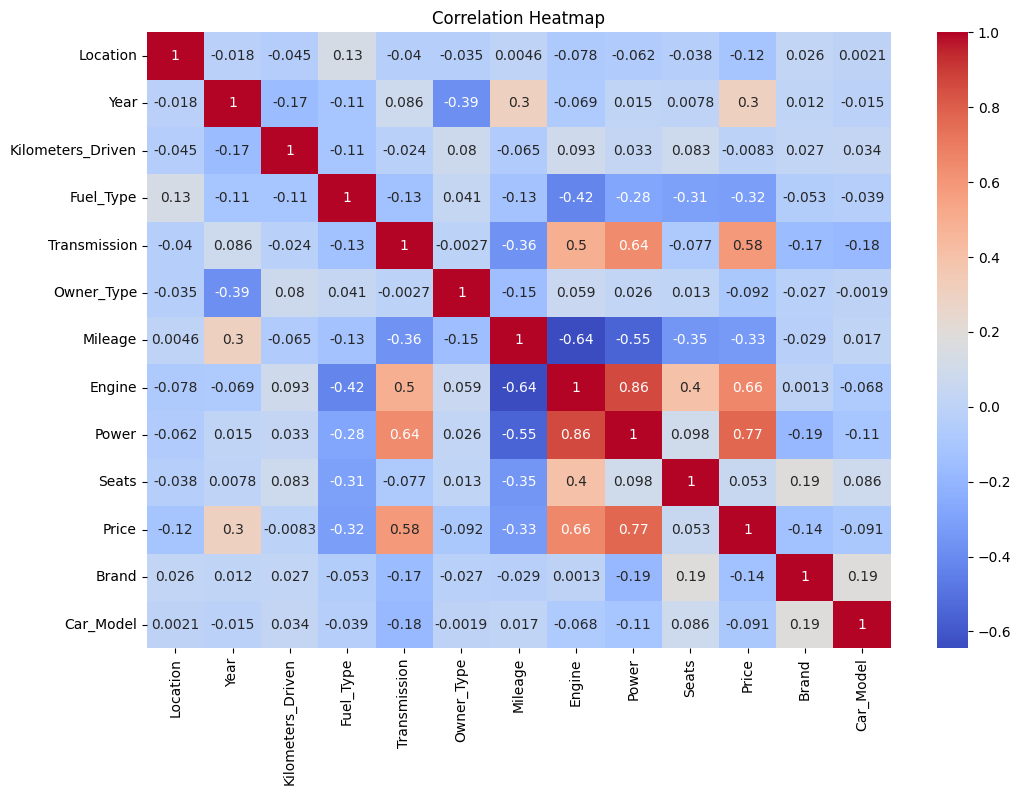

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

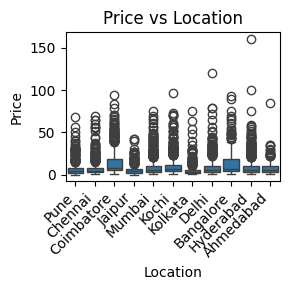

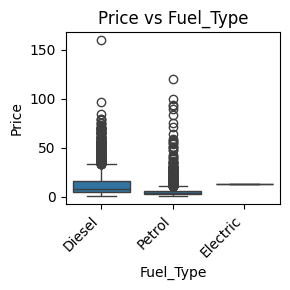

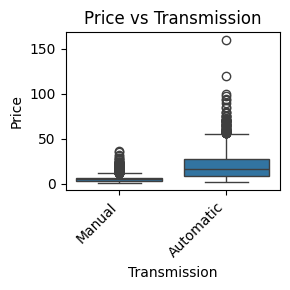

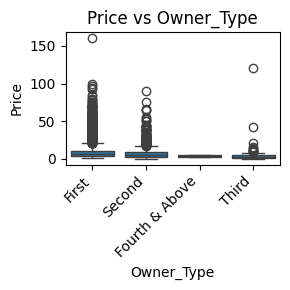

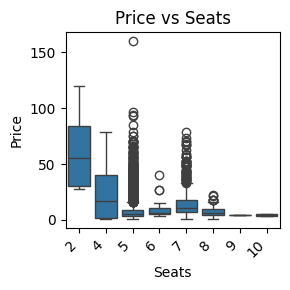

In [ ]:
categorical_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

for col in categorical_cols:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=cars, x=col, y='Price')
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
df['Price'].describe()

,Price
count,5809.000000
mean,9.674531
std,11.290224
min,0.440000
25%,3.590000
50%,5.750000
75%,10.250000
max,160.000000


In [ ]:
correlation = df.corr()['Price'].sort_values()
correlation

,Price
Mileage,-0.333318
Fuel_Type,-0.317009
Brand,-0.136707
Location,-0.116595
Owner_Type,-0.091525
Car_Model,-0.090632
Kilometers_Driven,-0.008342
Seats,0.053214
Year,0.300642
Transmission,0.583954


In [29]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Model
0,10,2015,41000,0,0,1,19.67,1582.0,126.20,5,12.50,10,442
1,2,2011,46000,2,0,1,13.00,1199.0,88.70,5,4.50,9,892
2,2,2012,87000,0,0,1,20.77,1248.0,88.76,7,6.00,18,605
3,3,2013,40670,0,1,2,15.20,1968.0,140.80,5,17.74,1,93
4,6,2013,86999,0,0,1,23.08,1461.0,63.10,5,3.50,22,978


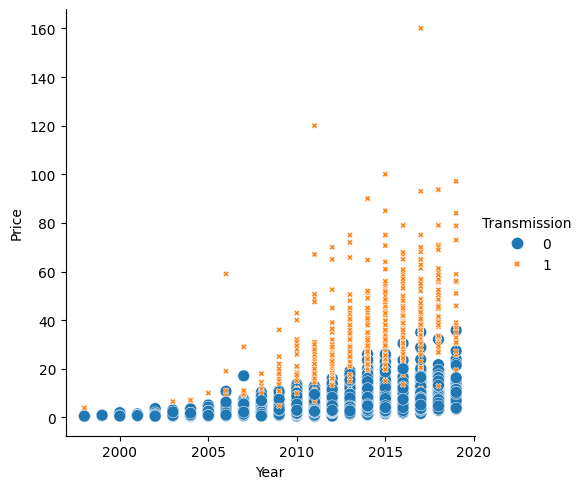

In [33]:
sns.relplot(
    data=df,
    x=df['Year'], y=df['Price'],
    hue="Transmission", style="Transmission", size="Transmission",
)